In [51]:
import pandas as pd

total_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv")
total_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [52]:
total_data = total_data.drop_duplicates().reset_index(drop = True)
total_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [53]:
total_data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [54]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


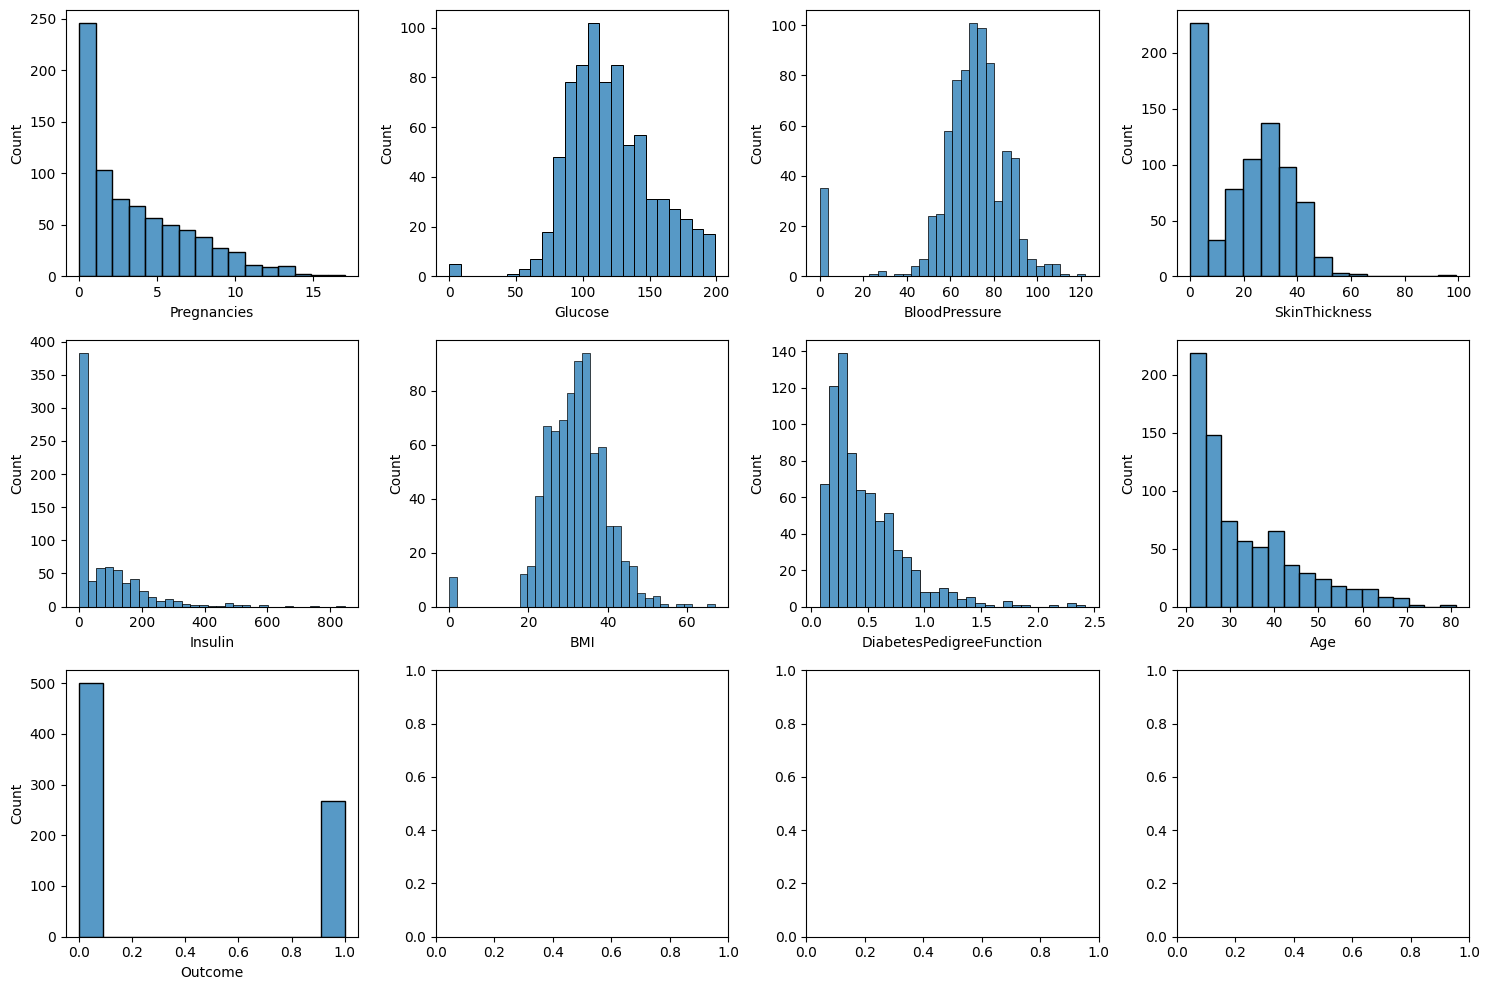

In [55]:
#Analysis on categorical variables

import matplotlib.pyplot as plt 
import seaborn as sns

fig, axis = plt.subplots(3, 4, figsize=(15, 10))


sns.histplot(ax=axis[0, 0], data=total_data, x="Pregnancies")
sns.histplot(ax=axis[0, 1], data=total_data, x="Glucose")
sns.histplot(ax=axis[0, 2], data=total_data, x="BloodPressure")
sns.histplot(ax=axis[0, 3], data=total_data, x="SkinThickness")
sns.histplot(ax=axis[1, 0], data=total_data, x="Insulin")
sns.histplot(ax=axis[1, 1], data=total_data, x="BMI")
sns.histplot(ax=axis[1, 2], data=total_data, x="DiabetesPedigreeFunction")
sns.histplot(ax=axis[1, 3], data=total_data, x="Age")
sns.histplot(ax=axis[2, 0], data=total_data, x="Outcome")  # Ajustado el índice aquí


plt.tight_layout()


plt.show()

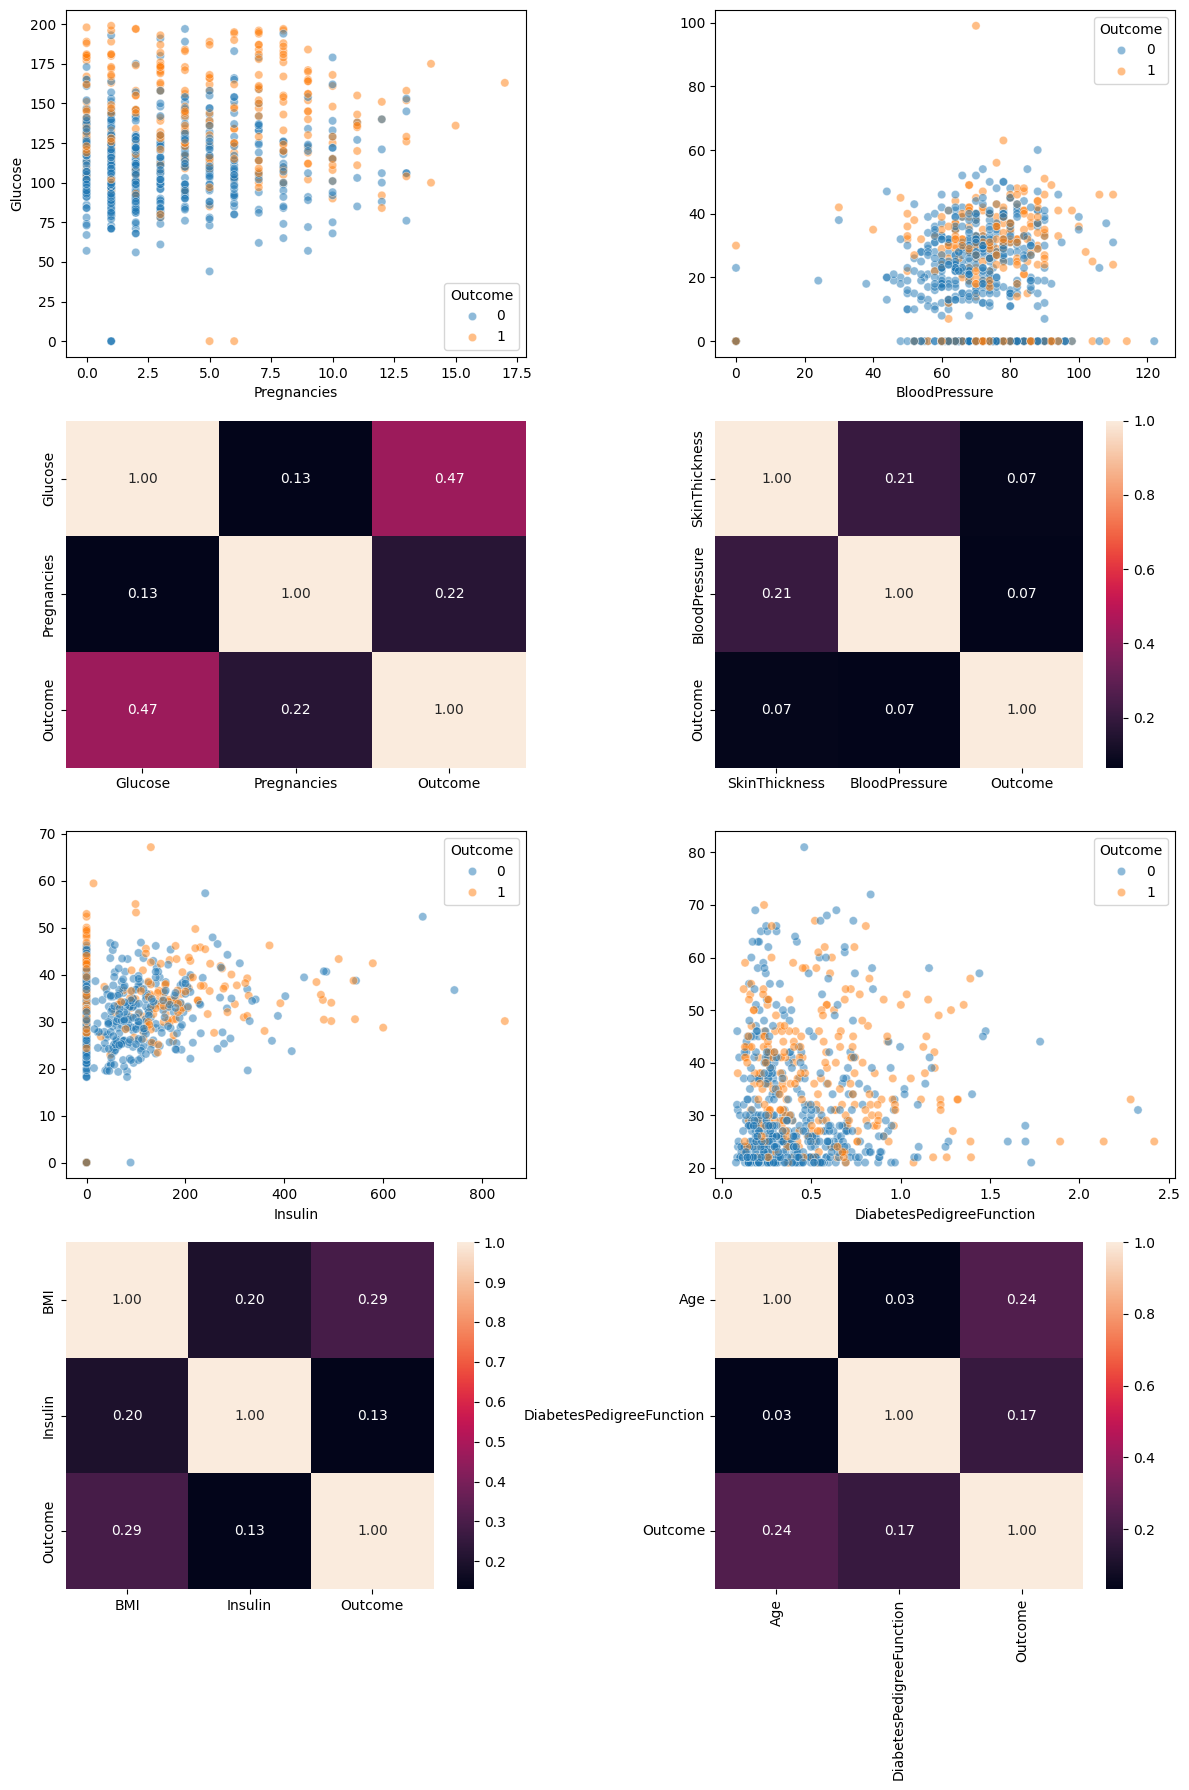

In [56]:
# Numerical - Numerical Analysis


fig, axis = plt.subplots(4, 2, figsize=(12, 18))


sns.scatterplot(ax=axis[0, 0], data=total_data, x="Pregnancies", y="Glucose", hue="Outcome", alpha=0.5)
sns.heatmap(total_data[["Glucose", "Pregnancies", "Outcome"]].corr(), annot=True, fmt=".2f", ax=axis[1, 0], cbar=False)

sns.scatterplot(ax=axis[0, 1], data=total_data, x="BloodPressure", y="SkinThickness", hue="Outcome", alpha=0.5).set(ylabel=None)
sns.heatmap(total_data[["SkinThickness", "BloodPressure", "Outcome"]].corr(), annot=True, fmt=".2f", ax=axis[1, 1])

sns.scatterplot(ax=axis[2, 0], data=total_data, x="Insulin", y="BMI", hue="Outcome", alpha=0.5).set(ylabel=None)
sns.heatmap(total_data[["BMI", "Insulin", "Outcome"]].corr(), annot=True, fmt=".2f", ax=axis[3, 0]).set(ylabel=None)

sns.scatterplot(ax=axis[2, 1], data=total_data, x="DiabetesPedigreeFunction", y="Age", hue="Outcome", alpha=0.5).set(ylabel=None)
sns.heatmap(total_data[["Age", "DiabetesPedigreeFunction", "Outcome"]].corr(), annot=True, fmt=".2f", ax=axis[3, 1]).set(ylabel=None)

plt.tight_layout()

plt.show()

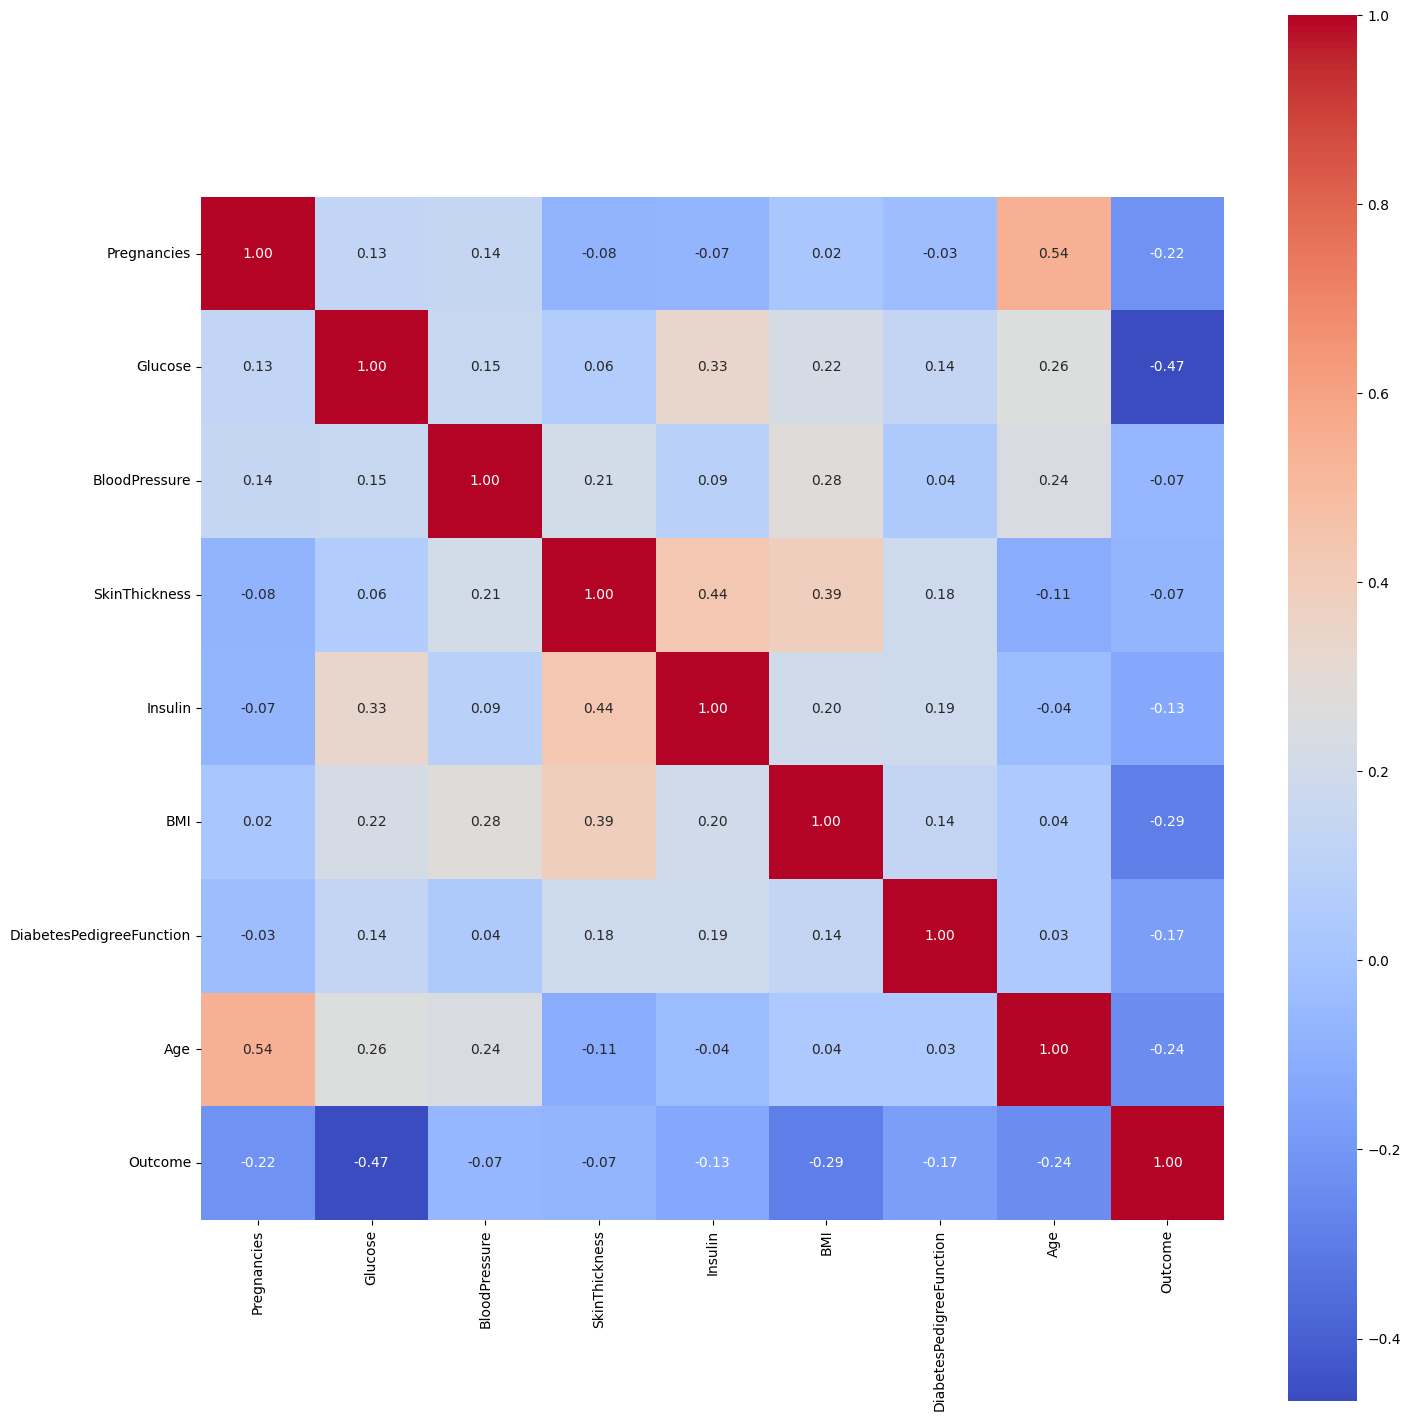

In [57]:
# Numerical-categorical analysis (complete)

total_data["Outcome"] = pd.factorize(total_data["Outcome"])[0]


fig, axes = plt.subplots(figsize=(15, 15))


correlation_matrix = total_data[["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", 
                                 "BMI", "DiabetesPedigreeFunction", "Age", "Outcome"]].corr()


sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, square=True)


plt.tight_layout()


plt.show()

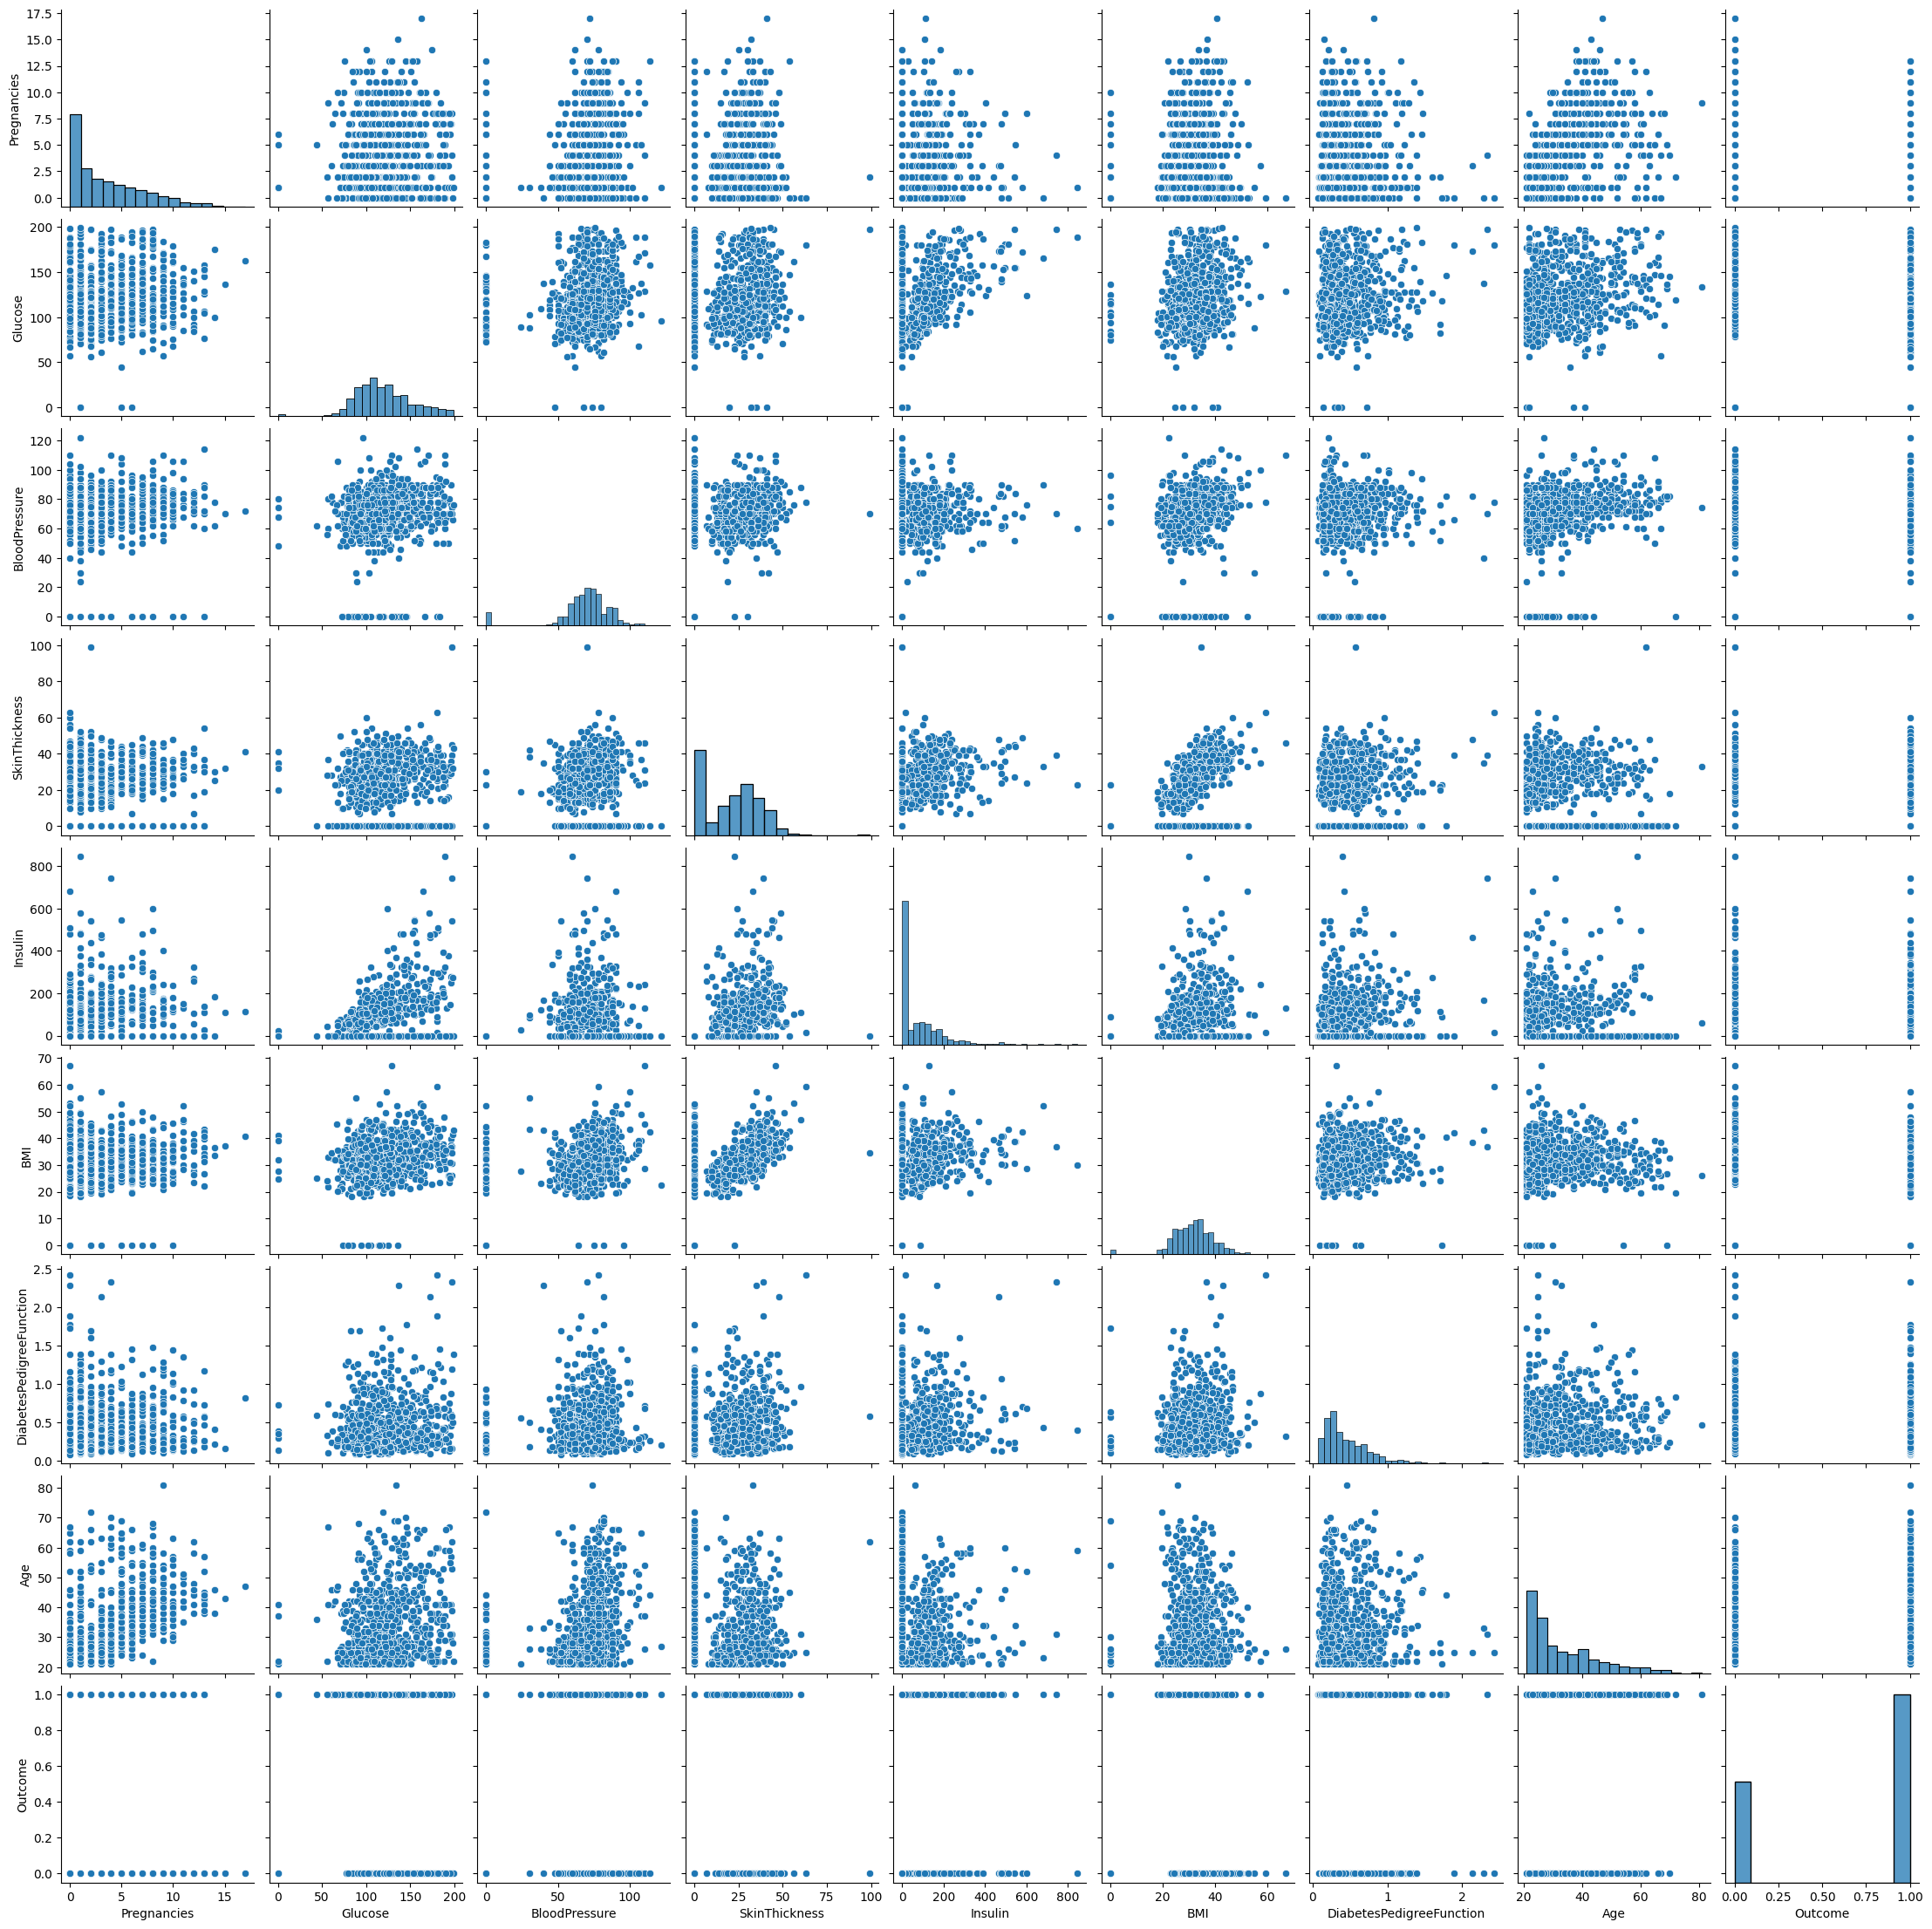

In [58]:
# Analysing all the Data at Once
sns.pairplot(data = total_data)

In [59]:
#Outlier analysis

total_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.651042
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,1.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


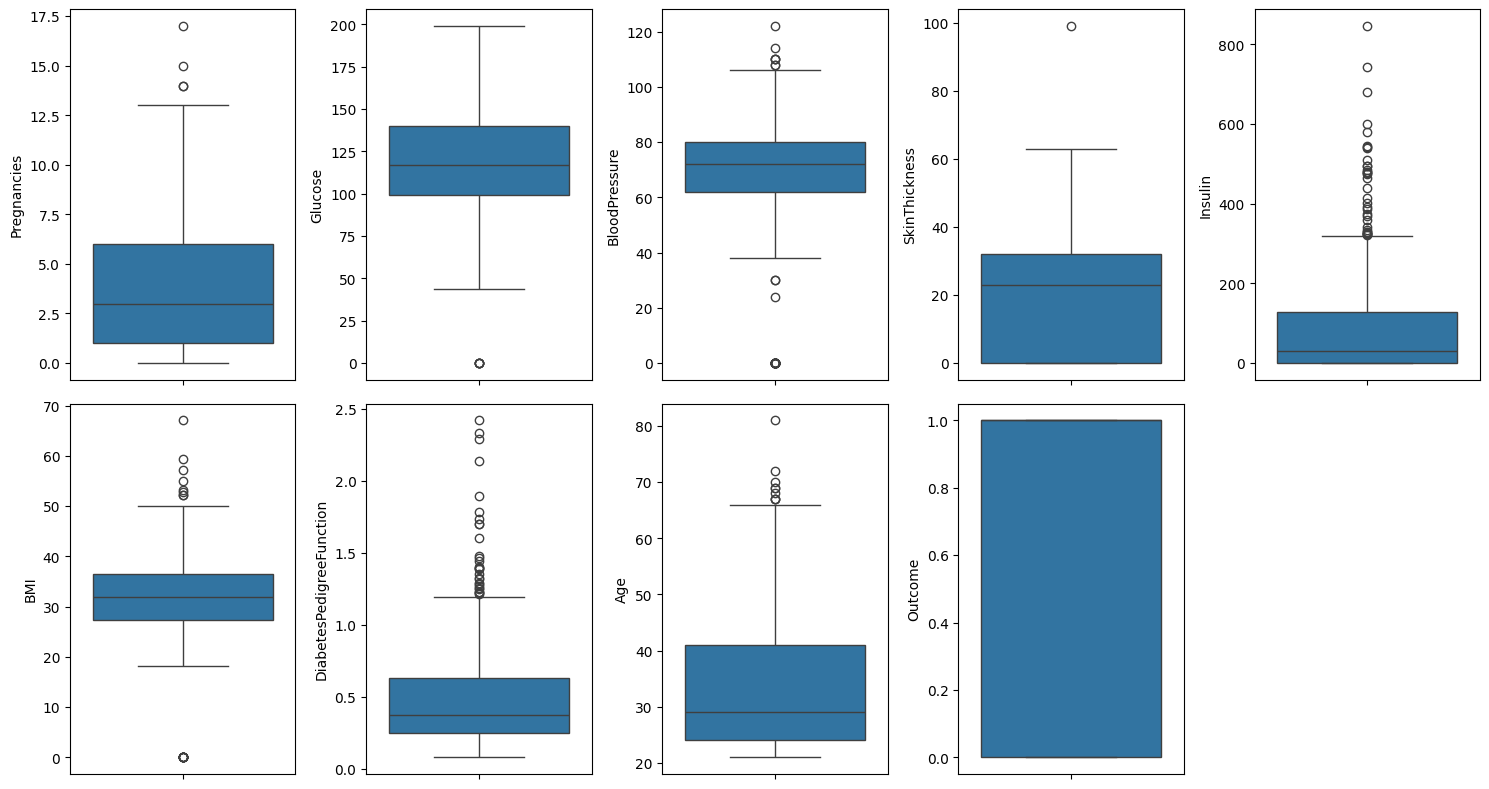

In [63]:

import warnings

# Desactivar todas las advertencias de DeprecationWarning
warnings.filterwarnings("ignore", category=FutureWarning)

# Factorize the Outcome Data

fig, axes = plt.subplots(2, 5, figsize=(15, 8))

sns.boxplot(ax=axes[0, 0], data=total_data, y="Pregnancies")
sns.boxplot(ax=axes[0, 1], data=total_data, y="Glucose")
sns.boxplot(ax=axes[0, 2], data=total_data, y="BloodPressure")
sns.boxplot(ax=axes[0, 3], data=total_data, y="SkinThickness")
sns.boxplot(ax=axes[0, 4], data=total_data, y="Insulin")
sns.boxplot(ax=axes[1, 0], data=total_data, y="BMI")
sns.boxplot(ax=axes[1, 1], data=total_data, y="DiabetesPedigreeFunction")
sns.boxplot(ax=axes[1, 2], data=total_data, y="Age")
sns.boxplot(ax=axes[1, 3], data=total_data, y="Outcome")

fig.delaxes(axes[1, 4])

plt.tight_layout()


plt.show()

In [64]:
# Outlier detection for Pregnancies

Pregnancies_stats = total_data["Pregnancies"].describe()
Pregnancies_stats

count    768.000000
mean       3.845052
std        3.369578
min        0.000000
25%        1.000000
50%        3.000000
75%        6.000000
max       17.000000
Name: Pregnancies, dtype: float64

In [72]:

# Calcular estadísticas para "Pregnancies"
Pregnancies_stats = total_data["Pregnancies"].describe()

# Calcular el rango intercuartílico (IQR) para "Pregnancies"
Pregnancies_iqr = Pregnancies_stats["75%"] - Pregnancies_stats["25%"]
upper_limit = Pregnancies_stats["75%"] + 1.5 * Pregnancies_iqr
lower_limit = Pregnancies_stats["25%"] - 1.5 * Pregnancies_iqr

print(f"The upper and lower limits for finding outliers are {round(upper_limit, 2)} and {round(lower_limit, 2)}, with an interquartile range of {round(Pregnancies_iqr, 2)}")

# Filtrar outliers para "Pregnancies"
total_data = total_data[(total_data["Pregnancies"] >= lower_limit) & (total_data["Pregnancies"] <= upper_limit)]

# En resumen, esta línea de código ayuda a eliminar los valores atípicos para la variable "Pregnancies" de total_data, manteniendo solo las filas que cumplen
# con los criterios establecidos por el rango intercuartílico

# Imprimir la cantidad de valores atípicos removidos
count_outliers = total_data.shape[0] - Pregnancies_stats["count"]
print(f"Count of outliers removed: {count_outliers}")

The upper and lower limits for finding outliers are 14.5 and -5.5, with an interquartile range of 5.0
Count of outliers removed: 0.0


In [77]:
# Calcular estadísticas para "Glucose"
glucose_stats = total_data["Glucose"].describe()
glucose_iqr = glucose_stats["75%"] - glucose_stats["25%"]
upper_limit_glucose = glucose_stats["75%"] + 1.5 * glucose_iqr
lower_limit_glucose = glucose_stats["25%"] - 1.5 * glucose_iqr
print(f"The upper and lower limits for finding outliers are {round(upper_limit, 2)} and {round(lower_limit, 2)}, with an interquartile range of {round(glucose_iqr, 2)}")


total_data = total_data[(total_data["Glucose"] >= lower_limit_glucose) & (total_data["Glucose"] <= upper_limit_glucose)]
count_outliers_glucose = total_data.shape[0] - glucose_stats["count"]
print(f"Count of outliers removed for Glucose: {count_outliers_glucose}")

# Calcular estadísticas para "BloodPressure"
blood_pressure_stats = total_data["BloodPressure"].describe()
blood_pressure_iqr = blood_pressure_stats["75%"] - blood_pressure_stats["25%"]
upper_limit_bp = blood_pressure_stats["75%"] + 1.5 * blood_pressure_iqr
lower_limit_bp = blood_pressure_stats["25%"] - 1.5 * blood_pressure_iqr
print(f"The upper and lower limits for finding outliers are {round(upper_limit, 2)} and {round(lower_limit, 2)}, with an interquartile range of {round(blood_pressure_iqr, 2)}")

total_data = total_data[(total_data["BloodPressure"] >= lower_limit_bp) & (total_data["BloodPressure"] <= upper_limit_bp)]
count_outliers_bp = total_data.shape[0] - blood_pressure_stats["count"]
print(f"Count of outliers removed for BloodPressure: {count_outliers_bp}")

# Calcular estadísticas para "SkinThickness"
skin_thickness_stats = total_data["SkinThickness"].describe()
skin_thickness_iqr = skin_thickness_stats["75%"] - skin_thickness_stats["25%"]
upper_limit_skin = skin_thickness_stats["75%"] + 1.5 * skin_thickness_iqr
lower_limit_skin = skin_thickness_stats["25%"] - 1.5 * skin_thickness_iqr
print(f"The upper and lower limits for finding outliers are {round(upper_limit_skin, 2)} and {round(lower_limit_skin, 2)}, with an interquartile range of {round(skin_thickness_iqr, 2)}")

# Filtrar outliers para "SkinThickness"
total_data = total_data[(total_data["SkinThickness"] >= lower_limit_skin) & (total_data["SkinThickness"] <= upper_limit_skin)]
count_outliers_skin = total_data.shape[0] - skin_thickness_stats["count"]
print(f"Count of outliers removed for SkinThickness: {count_outliers_skin}")

# Calcular estadísticas para "Insulin"
insulin_stats = total_data["Insulin"].describe()
insulin_iqr = insulin_stats["75%"] - insulin_stats["25%"]
upper_limit_insulin = insulin_stats["75%"] + 1.5 * insulin_iqr
lower_limit_insulin = insulin_stats["25%"] - 1.5 * insulin_iqr
print(f"The upper and lower limits for finding outliers are {round(upper_limit_insulin, 2)} and {round(lower_limit_insulin, 2)}, with an interquartile range of {round(insulin_iqr, 2)}")

# Filtrar outliers para "Insulin"
total_data = total_data[(total_data["Insulin"] >= lower_limit_insulin) & (total_data["Insulin"] <= upper_limit_insulin)]
count_outliers_insulin = total_data.shape[0] - insulin_stats["count"]
print(f"Count of outliers removed for Insulin: {count_outliers_insulin}")

# Calcular estadísticas para "BMI"
bmi_stats = total_data["BMI"].describe()
bmi_iqr = bmi_stats["75%"] - bmi_stats["25%"]
upper_limit_bmi = bmi_stats["75%"] + 1.5 * bmi_iqr
lower_limit_bmi = bmi_stats["25%"] - 1.5 * bmi_iqr
print(f"The upper and lower limits for finding outliers are {round(upper_limit_bmi, 2)} and {round(lower_limit_bmi, 2)}, with an interquartile range of {round(bmi_iqr, 2)}")

# Filtrar outliers para "BMI"
total_data = total_data[(total_data["BMI"] >= lower_limit_bmi) & (total_data["BMI"] <= upper_limit_bmi)]
count_outliers_bmi = total_data.shape[0] - bmi_stats["count"]
print(f"Count of outliers removed for BMI: {count_outliers_bmi}")

# Calcular estadísticas para "DiabetesPedigreeFunction"
dpf_stats = total_data["DiabetesPedigreeFunction"].describe()
dpf_iqr = dpf_stats["75%"] - dpf_stats["25%"]
upper_limit_dpf = dpf_stats["75%"] + 1.5 * dpf_iqr
lower_limit_dpf = dpf_stats["25%"] - 1.5 * dpf_iqr
print(f"The upper and lower limits for finding outliers are {round(upper_limit_dpf, 2)} and {round(lower_limit_dpf, 2)}, with an interquartile range of {round(dpf_iqr, 2)}")

# Filtrar outliers para "DiabetesPedigreeFunction"
total_data = total_data[(total_data["DiabetesPedigreeFunction"] >= lower_limit_dpf) & (total_data["DiabetesPedigreeFunction"] <= upper_limit_dpf)]
count_outliers_dpf = total_data.shape[0] - dpf_stats["count"]
print(f"Count of outliers removed for DiabetesPedigreeFunction: {count_outliers_dpf}")

# Calcular estadísticas para "Age"
age_stats = total_data["Age"].describe()
age_iqr = age_stats["75%"] - age_stats["25%"]
upper_limit_age = age_stats["75%"] + 1.5 * age_iqr
lower_limit_age = age_stats["25%"] - 1.5 * age_iqr
print(f"The upper and lower limits for finding outliers are {round(upper_limit_age, 2)} and {round(lower_limit_age, 2)}, with an interquartile range of {round(age_iqr, 2)}")

# Filtrar outliers para "Age"
total_data = total_data[(total_data["Age"] >= lower_limit_age) & (total_data["Age"] <= upper_limit_age)]
count_outliers_age = total_data.shape[0] - age_stats["count"]
print(f"Count of outliers removed for Age: {count_outliers_age}")

# Calcular estadísticas para "Outcome"
outcome_stats = total_data["Outcome"].describe()
outcome_iqr = outcome_stats["75%"] - outcome_stats["25%"]
upper_limit_outcome = outcome_stats["75%"] + 1.5 * outcome_iqr
lower_limit_outcome = outcome_stats["25%"] - 1.5 * outcome_iqr
print(f"The upper and lower limits for finding outliers are {round(upper_limit_outcome, 2)} and {round(lower_limit_outcome, 2)}, with an interquartile range of {round(outcome_iqr, 2)}")

# Filtrar outliers para "Outcome"
total_data = total_data[(total_data["Outcome"] >= lower_limit_outcome) & (total_data["Outcome"] <= upper_limit_outcome)]
count_outliers_outcome = total_data.shape[0] - outcome_stats["count"]
print(f"Count of outliers removed for Outcome: {count_outliers_outcome}")




The upper and lower limits for finding outliers are 14.5 and -5.5, with an interquartile range of 43.0
Count of outliers removed for Glucose: 0.0
The upper and lower limits for finding outliers are 14.5 and -5.5, with an interquartile range of 16.0
Count of outliers removed for BloodPressure: 0.0
The upper and lower limits for finding outliers are 80.0 and -48.0, with an interquartile range of 32.0
Count of outliers removed for SkinThickness: -1.0
The upper and lower limits for finding outliers are 327.5 and -196.5, with an interquartile range of 131.0
Count of outliers removed for Insulin: -26.0
The upper and lower limits for finding outliers are 48.5 and 14.1, with an interquartile range of 8.6
Count of outliers removed for BMI: -7.0
The upper and lower limits for finding outliers are 1.2 and -0.33, with an interquartile range of 0.38
Count of outliers removed for DiabetesPedigreeFunction: -21.0
The upper and lower limits for finding outliers are 66.5 and -1.5, with an interquartile 

In [79]:
# Missing value analysis
total_data.isnull().sum().sort_values(ascending = False)

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [80]:
# No hace falta que escalemos los datos ni los factoricemos , directamente hacemos el guardado de train y test .
# Nuestra variable objetivo es Outcome.

from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import train_test_split

X = total_data.drop("Outcome", axis = 1)
y = total_data["Outcome"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

selection_model = SelectKBest(k = 7)
selection_model.fit(X_train, y_train)

selected_columns = X_train.columns[selection_model.get_support()]
X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns = selected_columns)
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns = selected_columns)

X_train_sel.head()

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age
0,4.0,131.0,68.0,166.0,33.1,0.160,28.0
1,3.0,130.0,64.0,0.0,23.1,0.314,22.0
2,1.0,128.0,48.0,194.0,40.5,0.613,24.0
3,11.0,143.0,94.0,146.0,36.6,0.254,51.0
4,6.0,154.0,78.0,140.0,46.1,0.571,27.0


In [81]:
X_test_sel.head()

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age
0,10.0,101.0,76.0,180.0,32.9,0.171,63.0
1,1.0,89.0,76.0,37.0,31.2,0.192,23.0
2,7.0,159.0,66.0,0.0,30.4,0.383,36.0
3,3.0,83.0,58.0,18.0,34.3,0.336,25.0
4,4.0,156.0,75.0,0.0,48.3,0.238,32.0


In [82]:
X_train_sel["Outcome"] = y_train.values
X_test_sel["Outcome"] = y_test.values
X_train_sel.to_csv("../data/processed/clean_train.csv", index = False)
X_test_sel.to_csv("../data/processed/clean_test.csv", index = False)

In [83]:
# Decision Tree model
train_data = pd.read_csv("../data/processed/clean_train.csv")
test_data = pd.read_csv("../data/processed/clean_test.csv")

train_data.head()

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,4.0,131.0,68.0,166.0,33.1,0.160,28.0,1
1,3.0,130.0,64.0,0.0,23.1,0.314,22.0,1
2,1.0,128.0,48.0,194.0,40.5,0.613,24.0,0
3,11.0,143.0,94.0,146.0,36.6,0.254,51.0,0
4,6.0,154.0,78.0,140.0,46.1,0.571,27.0,1


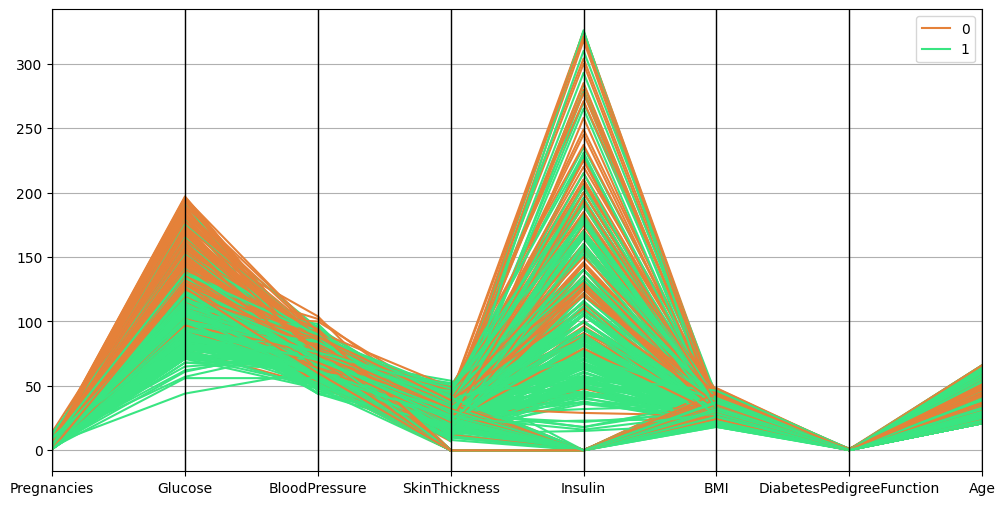

In [84]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

pd.plotting.parallel_coordinates(total_data, "Outcome", color = ("#E58139", "#39E581", "#8139E5"))

plt.show()

In [85]:
X_train = train_data.drop(["Outcome"], axis = 1)
y_train = train_data["Outcome"]
X_test = test_data.drop(["Outcome"], axis = 1)
y_test = test_data["Outcome"]



Esta separación facilita el entrenamiento del modelo utilizando X_train e y_train y luego evaluar el rendimiento del modelo utilizando X_test e y_test. Al tener conjuntos de entrenamiento y prueba separados, podemos verificar cómo se desempeña el modelo en datos que no ha visto durante el entrenamiento, lo que es esencial para evaluar su capacidad de generalización.

In [86]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state = 42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
from sklearn import tree

fig = plt.figure(figsize=(200,200))

tree.plot_tree(model, feature_names = list(X_train.columns), class_names = ["0", "1", "2"], filled = True)

plt.show()
